# 👋🌍 Hello, world: Submit a Qiskit job to Quantinuum

In this notebook, we'll review the basics of Azure Quantum by submitting a simple *job*, or quantum program, to [Quantinuum](https://aka.ms/AQ/Quantinuum/Documentation). We will use [Qiskit](https://qiskit.org/) to express the quantum job.

## Submit a simple job to Quantinuum using Azure Quantum
Azure Quantum provides several ways to express quantum programs. In this example we are using Qiskit, but note that Q# and Cirq are also supported. All code in this example will be written in Python.

Let's begin. When you see a code block, hover over it and click the triangle play-button to execute it. To avoid any compilation issues, this should be done in order from top to bottom.

### 1. Connect to the Azure Quantum workspace

To connect to the Azure Quantum service, construct an instance of the `AzureQuantumProvider`. Note that it's imported from `azure.quantum.qiskit`.

In [1]:
from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider (
    resource_id = "",
    location = ""
)

Let's see what providers and targets are enabled in this workspace with the following command:

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

This workspace's targets:
- ionq.qpu
- ionq.simulator
- quantinuum.qpu.h1-1
- quantinuum.sim.h1-1sc
- quantinuum.qpu.h1-2
- quantinuum.sim.h1-2sc
- quantinuum.sim.h1-1e
- quantinuum.sim.h1-2e


### ❕ Do you see `quantinuum.sim.h1-1sc` in your list of targets? If so, you're ready to keep going.

Don't see it? You may need to add Quantinuum to your workspace to run this sample. Navigate to the **Providers** page in the portal and click **+Add** to add the Quantinuum provider. Don't worry, there's a free credits plan available.

## Quantinuum: The quantum provider
Azure Quantum partners with third-party companies to deliver solutions to quantum jobs. These company offerings are called *providers*. Each provider can offer multiple *targets* with different capabilities. See the table below for Quantinuum's H1-1 device targets.

| Target name | Target ID | Number of qubits | Description|
| --- | ---| ---|---|
H1-1 Syntax Checker | `quantinuum.sim.h1-1sc` | 20 | Quantinuum's H1-1 Syntax Checker. This will return all zeros in place of actual or simulated results. Use this to validate quantum programs against the H1-1 compiler before submitting to hardware or emulators on Quantinuum's platform. Free of cost. |
H1-2 Syntax Checker | `quantinuum.sim.h1-2sc` | 20 | Quantinuum's H1-2 Syntax Checker. This will return all zeros in place of actual or simulated results. Use this to validate quantum programs against the H1-2 compiler before submitting to hardware or emulators on Quantinuum's platform. Free of cost.  |
H2-1 Syntax Checker | `quantinuum.sim.h2-1sc` | 32 | Quantinuum's H2-1 Syntax Checker. This will return all zeros in place of actual or simulated results. Use this to validate quantum programs against the H2-1 compiler before submitting to hardware or emulators on Quantinuum's platform. Free of cost.  |
H1-1 Emulator | `quantinuum.sim.h1-1e` | 20 | Quantinuum's H1-1 Emulator. Uses a realistic physical model and noise model of H1-1. |
H1-2 Emulator | `quantinuum.sim.h1-2e` | 20 | Quantinuum's H1-2 Emulator. Uses a realistic physical model and noise model of H1-2. |
H2-1 Emulator | `quantinuum.sim.h2-1e` | 32 | Quantinuum's H2-1 Emulator. Uses a realistic physical model and noise model of H2-1. |
H1-1 | `quantinuum.qpu.h1-1` | 20 | Quantinuum's H1-1 trapped ion device. |
H1-2 | `quantinuum.qpu.h1-2` | 20 | Quantinuum's H1-2 trapped ion device. |
H2-1 | `quantinuum.qpu.h2-1` | 32 | Quantinuum's H2-1 trapped ion device. |

For this example, we will use `quantinuum.sim.h1-2sc` to avoid any costs or credit usage. If you wish to emulate or run the actual circuit, you may replace all instances of `quantinuum.sim.h1-2sc` in subsequent code cells with one of the other values in the table above, but please note any costs incurred. To learn more about Quantinuum's targets, check out our [documentation](https://aka.ms/AQ/Quantinuum/Documentation).

### 2. Build the quantum program

Let's create a simple Qiskit circuit to run.

In [3]:
# Create a quantum circuit acting on a single qubit
circuit = QuantumCircuit(1,1)
circuit.name = "Single qubit random"
circuit.h(0)
circuit.measure(0, 0)

# Print out the circuit
circuit.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

The circuit you built is a simple quantum random bit generator. With Quantinuum's Syntax Checker, we will be able to confirm that the circuit is able to be run on the Quantinuum H1-2 emulator and hardware.

### 3. Submit the quantum program to Quantinuum

In [4]:
# Create an object that represents Quantinuum's Syntax Checker target, "quantinuum.sim.h1-2sc".
#   Note that any target you have enabled in this workspace can
#   be used here. Azure Quantum makes it extremely easy to submit
#   the same quantum program to different providers. 
quantinuum_api_val_backend = provider.get_backend("quantinuum.sim.h1-2sc")

# Using the Quantinuum target, call "run" to submit the job. We'll
# use a count of 100 (simulated runs).
job = quantinuum_api_val_backend.run(circuit, count=100)
print("Job id:", job.id())

Job id: cc4ff1e7-0213-11ed-bcce-f42679f0b639


The job ID can be used to retrieve the results later using the [get_details function](https://docs.microsoft.com/azure/quantum/optimization-job-reference#jobdetails) or by viewing it under the **Job management** section of the portal.

### 4. Obtain the job results
You can monitor the job status with Qiskit's `job_monitor` function.

This may take a minute or so ⏳. Your job will be packaged and sent to Quantinuum, where it will wait its turn to be run. You'll see your job go through these stages: "job is queued" &rarr; "job is actively running" &rarr; "job has successfully run."


Job Status: job has successfully run


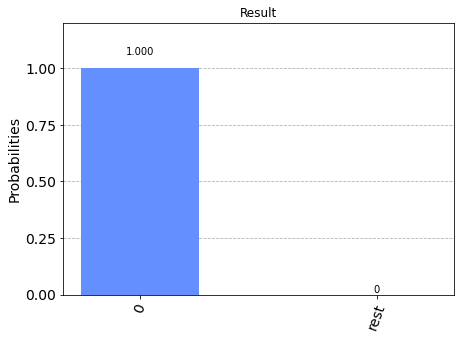

In [5]:
job_monitor(job)

result = job.result()

# The result object is native to the Qiskit package, so we can use Qiskit's tools to print the result as a histogram.
# For the syntax check, we expect to see all zeroes.
plot_histogram(result.get_counts(circuit), title="Result", number_to_keep=2)

**See the histogram above? Congratulations, you've submitted a job with Azure Quantum! 👏**


### 5. Estimate costs

To estimate the costs of running this program on a simulator or hardware, you can use the `backend.estimate_cost` method.

In [6]:
backend = provider.get_backend("quantinuum.qpu.h1-2")
cost = backend.estimate_cost(circuit, shots=100)
print(f"Estimated cost: {cost.estimated_total} {cost.currency_code}")

Estimated cost: 5.12 HQC


### 6. Next steps
Next, you can try running a program on Quantinuum's H1-2 emulation and hardware targets. Just replace `quantinuum.sim.h1-2sc` with `quantinuum.sim.h1-2e` or `quantinuum.qpu.h1-2`. Or try another sample by navigating back to the sample gallery. The same "hello world" sample can be run with different quantum providers by choosing another option in the gallery card drop-down menu. Don't worry - your work here is automatically saved.

To learn more about submitting Qiskit circuits to Azure Quantum, review [this documentation](https://docs.microsoft.com/azure/quantum/quickstart-microsoft-qiskit?pivots=platform-quantinuum).

To learn more about job pricing, review the [Azure Quantum documentation on job costs](https://docs.microsoft.com/azure/quantum/azure-quantum-job-costs).